K- means clustering

In this lesson, you will learn how to create clusters using Scikit-learn and the Nigerian music dataset you imported earlier. We will cover the basics of K-Means for Clustering. Keep in mind that, as you learned in the earlier lesson, there are many ways to work with clusters and the method you use depends on your data. We will try K-Means as it's the most common clustering technique. Let's get started!

Terms you will learn about:


    Silhouette scoring
    Elbow method
    Inertia
    Variance


Introduction

K-Means Clustering is a method derived from the domain of signal processing. It is used to divide and partition groups of data into 'k' clusters using a series of observations. Each observation works to group a given datapoint closest to its nearest 'mean', or the center point of a cluster.

The clusters can be visualized as Voronoi diagrams, which include a point (or 'seed') and its corresponding region.

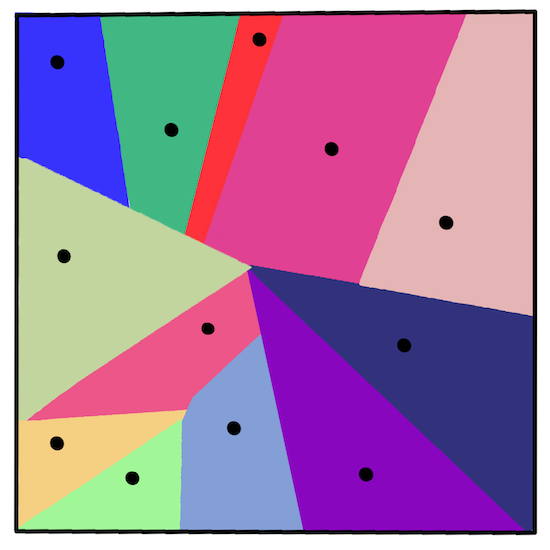

The K-Means clustering process executes in a three-step process:


    1 The algorithm selects k-number of center points by sampling from the dataset. After this, it loops:
        i It assigns each sample to the nearest centroid.
        ii It creates new centroids by taking the mean value of all of the samples assigned to the previous centroids.
       iii  Then, it calculates the difference between the new and old centroids and repeats until the centroids are stabilized.

One drawback of using K-Means includes the fact that you will need to establish 'k', that is the number of centroids. Fortunately the 'elbow method' helps to estimate a good starting value for 'k'. You'll try it in a minute.

Exercise - preparation

Start by taking another look at the songs data.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
df = pd.read_csv("../Data/nigerian-songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


1 Create a boxplot, calling boxplot() for each column:

<Axes: xlabel='release_date'>

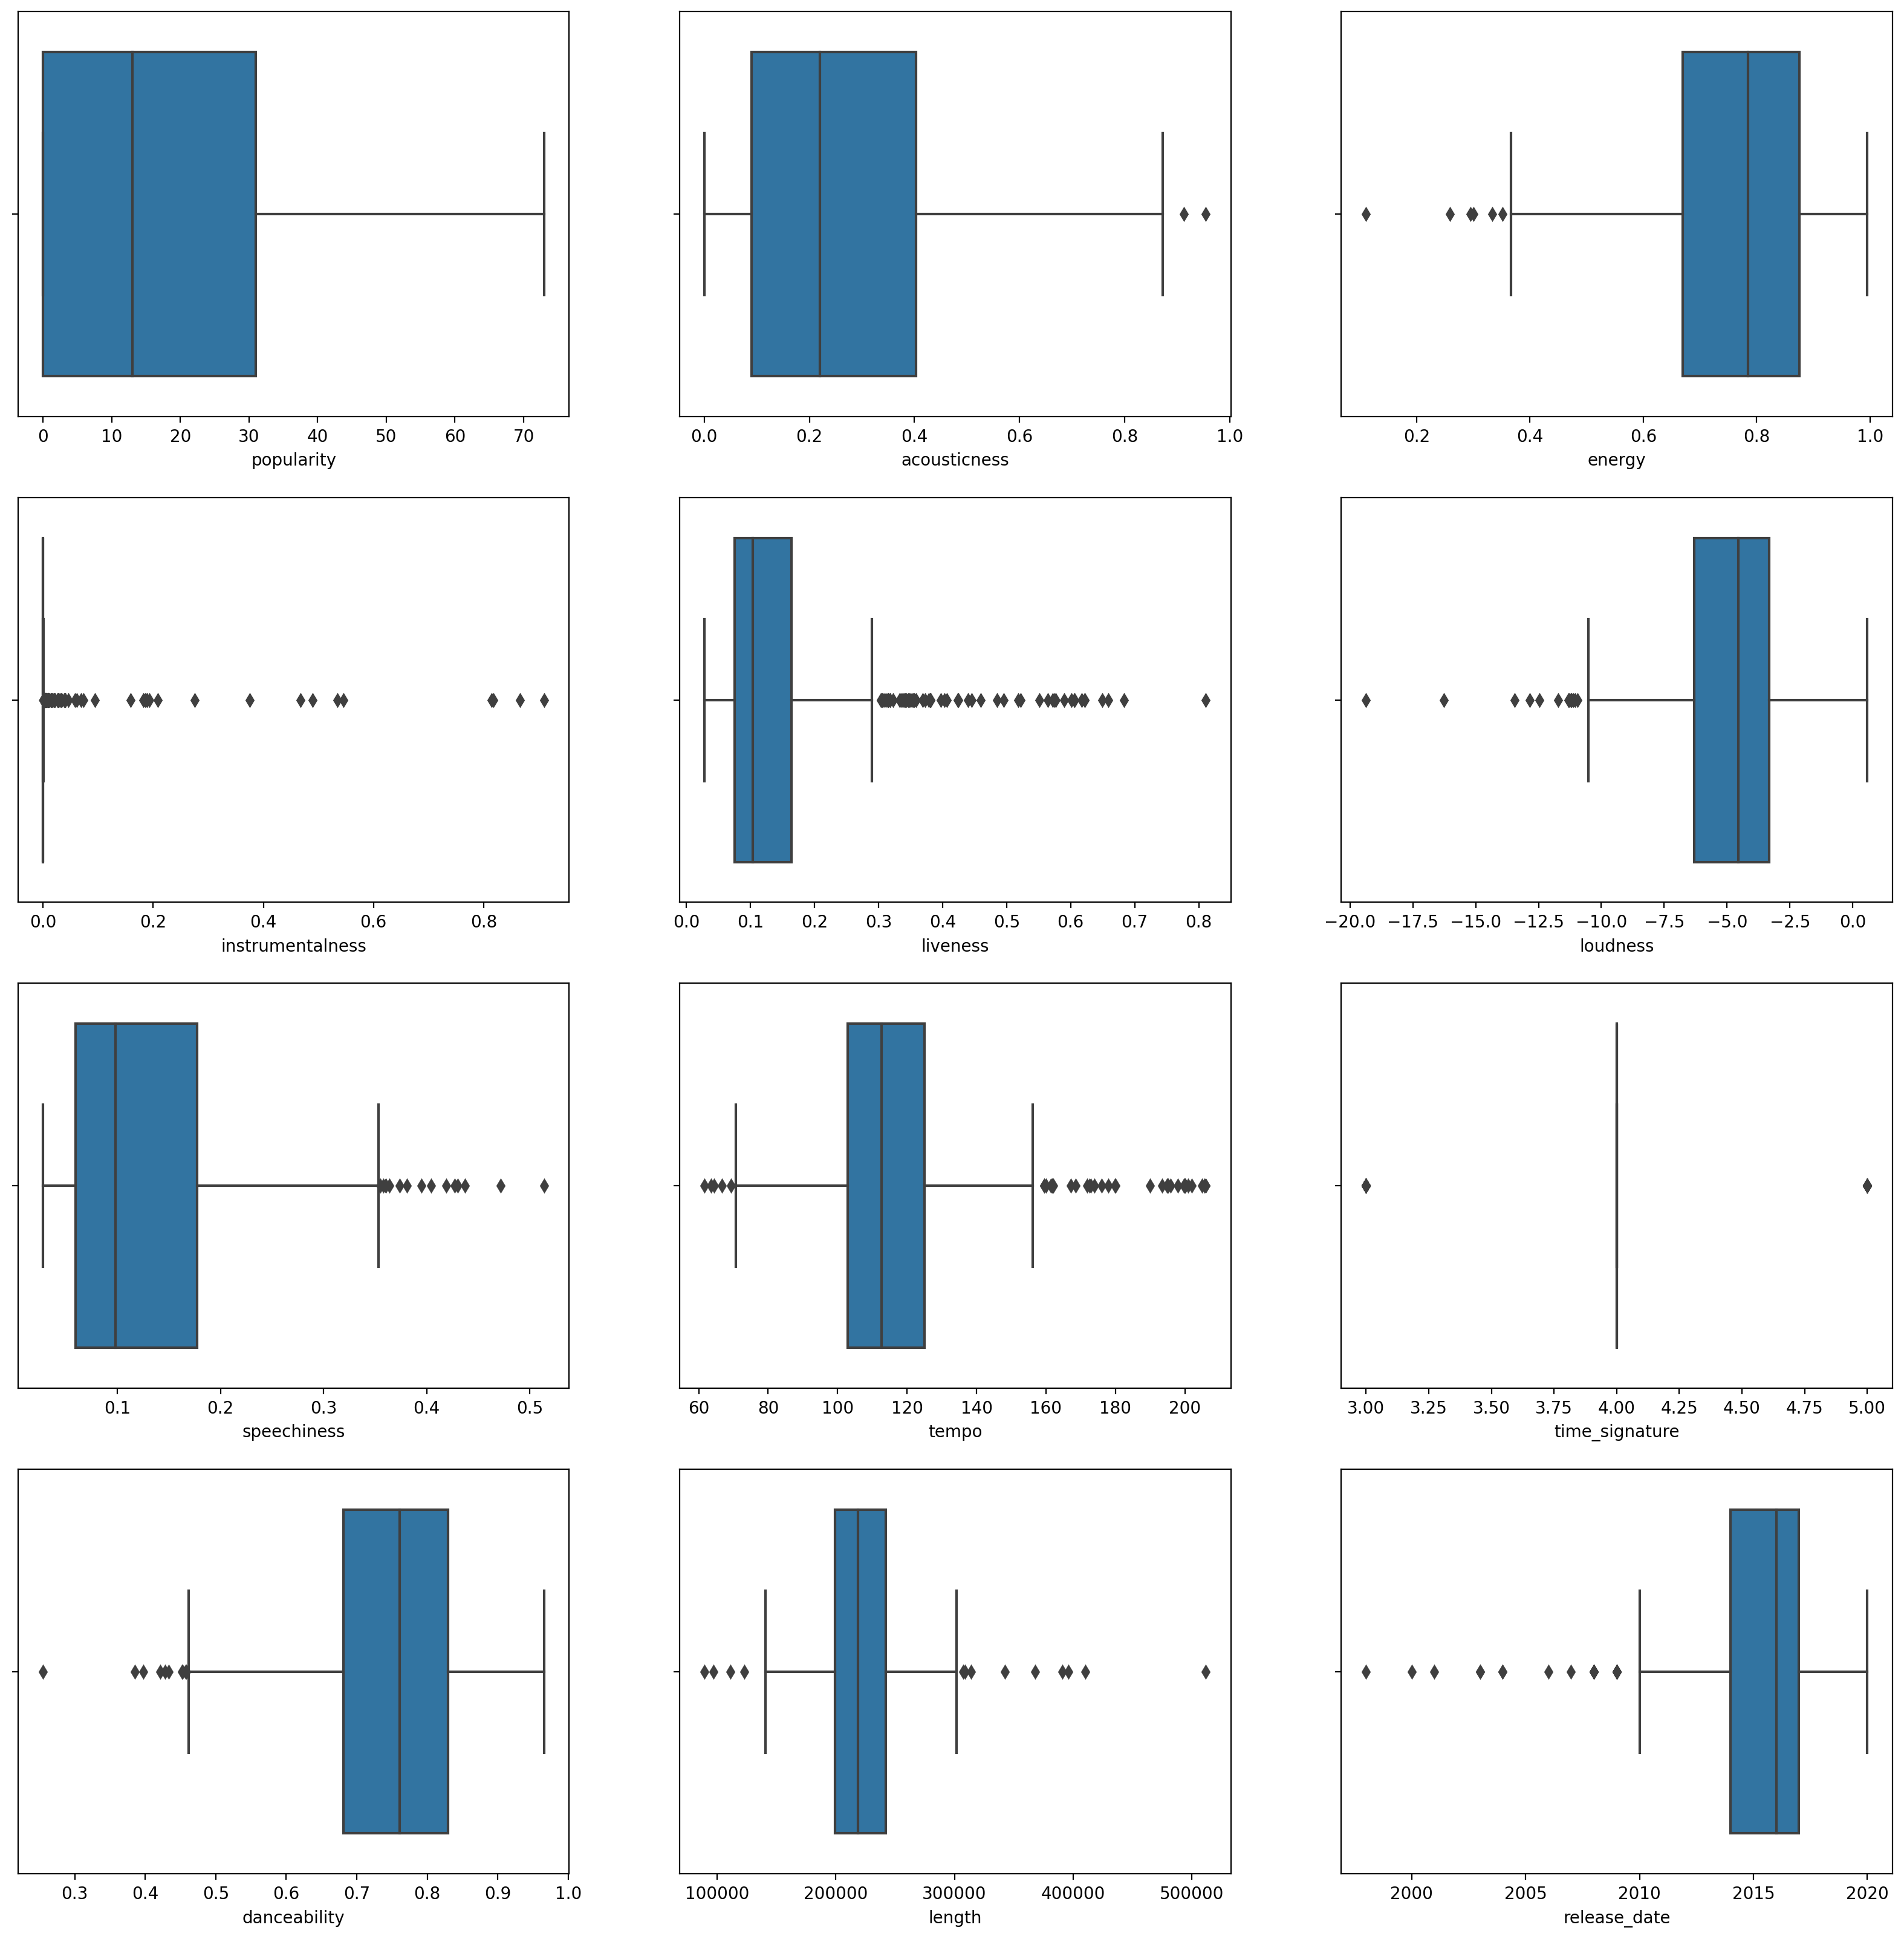

In [3]:
import seaborn as sns

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

This data is a little noisy: by observing each column as a boxplot, you can see outliers.

ou could go through the dataset and remove these outliers, but that would make the data pretty minimal.

1 For now, choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the artist_top_genre column as numeric data:

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

Now you need to pick how many clusters to target. You know there are 3 song genres that we carved out of the dataset, so let's try 3:

In [5]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

c:\Users\user\miniconda3\envs\Arewads\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\miniconda3\envs\Arewads\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0,
       1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,

You see an array printed out with predicted clusters (0, 1,or 2) for each row of the dataframe.

1 Use this array to calculate a 'silhouette score':

In [6]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5918299843029218

Silhouette score

Look for a silhouette score closer to 1. This score varies from -1 to 1, and if the score is 1, the cluster is dense and well-separated from other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters.source.

Our score is .59, so right in the middle. This indicates that our data is not particularly well-suited to this type of clustering, but let's continue.

Exercise - build a model

1 Import KMeans and start the clustering process.

In [7]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


c:\Users\user\miniconda3\envs\Arewads\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\miniconda3\envs\Arewads\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\user\miniconda3\envs\Arewads\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\miniconda3\envs\Arewads\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Elbow method

Previously, you surmised that, because you have targeted 3 song genres, you should choose 3 clusters. But is that the case?

    

Use the 'elbow method' to make sure.

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1000x500 with 0 Axes>

Exercise - display the clusters

Try the process again, this time setting three clusters, and display the clusters as a scatterplot:

c:\Users\user\miniconda3\envs\Arewads\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\miniconda3\envs\Arewads\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


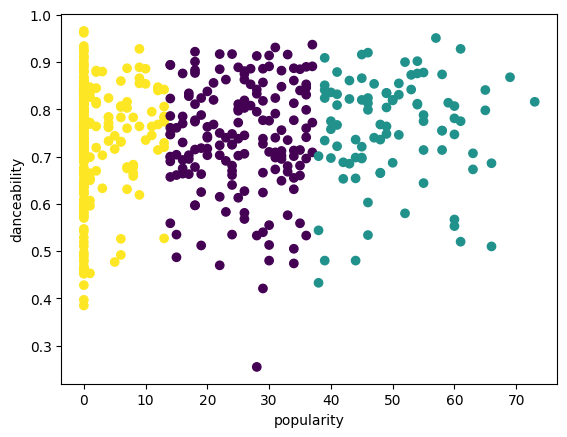

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

Check the model's accuracy:

In [12]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 71 out of 530 samples were correctly labeled.
Accuracy score: 0.13


This model's accuracy is not very good, and the shape of the clusters gives you a hint why.

This data is too imbalanced, too little correlated and there is too much variance between the column values to cluster well. In fact, the clusters that form are probably heavily influenced or skewed by the three genre categories we defined above. That was a learning process!

In Scikit-learn's documentation, you can see that a model like this one, with clusters not very well demarcated, has a 'variance' problem:

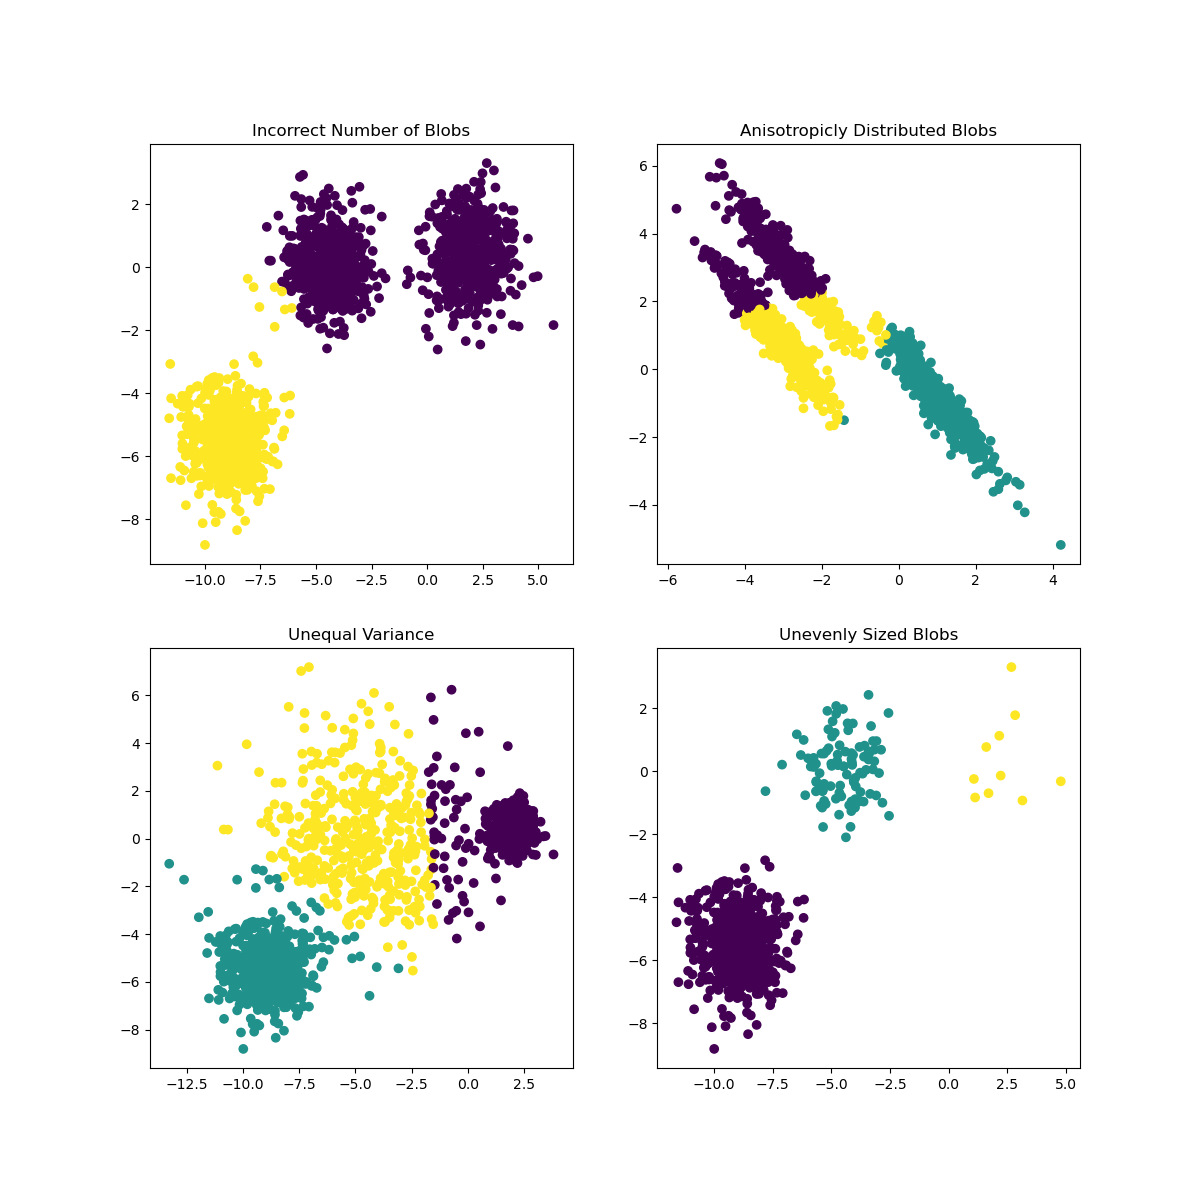

Variance

Variance is defined as "the average of the squared differences from the Mean" source. In the context of this clustering problem, it refers to data that the numbers of our dataset tend to diverge a bit too much from the mean.